# Multi-Layer Perceptron

In [17]:
from dataset_loader import load_dataset

path = "loan_data.csv"
dataset = load_dataset(path)
data = dataset.drop("loan_status", axis=1)
targets = dataset["loan_status"]

print(data.shape)

(44993, 13)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_labels, test_labels = train_test_split(data, targets, train_size=0.8, random_state=1)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import RandomizedSearchCV

# Building the model

model = Sequential([
    # Input layer
    Input(shape=(train_data_scaled.shape[1],)),

    # Hidden layers
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation="sigmoid")
])


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 224 (896.00 B)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

# Train model

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(train_data_scaled, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/50
900/900 - 5s - 5ms/step - accuracy: 0.8377 - loss: 0.4514 - val_accuracy: 0.8937 - val_loss: 0.3063
Epoch 2/50
900/900 - 2s - 3ms/step - accuracy: 0.8789 - loss: 0.3334 - val_accuracy: 0.8986 - val_loss: 0.2741
Epoch 3/50
900/900 - 2s - 3ms/step - accuracy: 0.8839 - loss: 0.3004 - val_accuracy: 0.9000 - val_loss: 0.2554
Epoch 4/50
900/900 - 2s - 3ms/step - accuracy: 0.8854 - loss: 0.2858 - val_accuracy: 0.8998 - val_loss: 0.2467
Epoch 5/50
900/900 - 2s - 3ms/step - accuracy: 0.8882 - loss: 0.2691 - val_accuracy: 0.9032 - val_loss: 0.2317
Epoch 6/50
900/900 - 2s - 3ms/step - accuracy: 0.8913 - loss: 0.2587 - val_accuracy: 0.9054 - val_loss: 0.2239
Epoch 7/50
900/900 - 3s - 3ms/step - accuracy: 0.8948 - loss: 0.2528 - val_accuracy: 0.9061 - val_loss: 0.2185
Epoch 8/50
900/900 - 2s - 3ms/step - accuracy: 0.8938 - loss: 0.2495 - val_accuracy: 0.9062 - val_loss: 0.2211
Epoch 9/50
900/900 - 2s - 3ms/step - accuracy: 0.8954 - loss: 0.2476 - val_accuracy: 0.9078 - val_loss: 0.2127
E

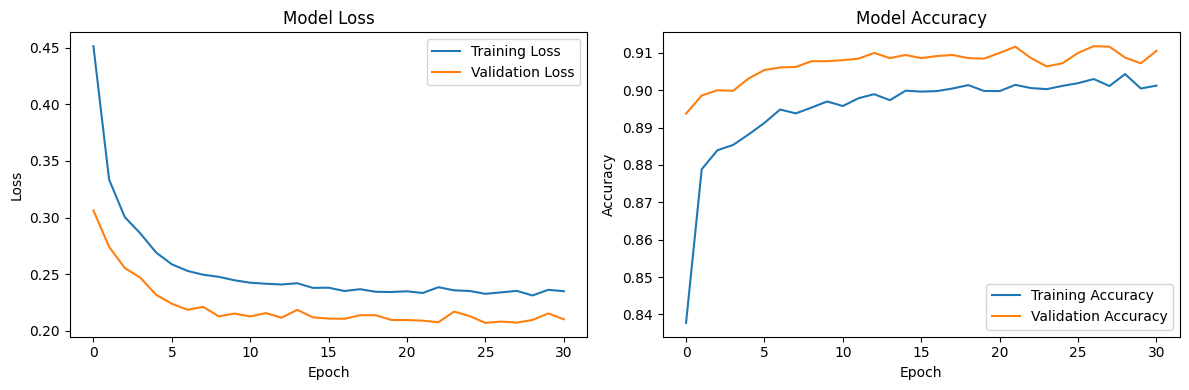

In [83]:
import matplotlib.pyplot as plt

# Plot training history

plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [84]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc

# Predictions

pred = model.predict(test_data_scaled)
y_pred = (pred > 0.5).astype(int)

cm = confusion_matrix(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
fpr, tpr, thresholds = roc_curve(test_labels, pred)
roc_auc = auc(fpr, tpr)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [85]:
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1-Score: 0.7845
Accuracy: 0.9111


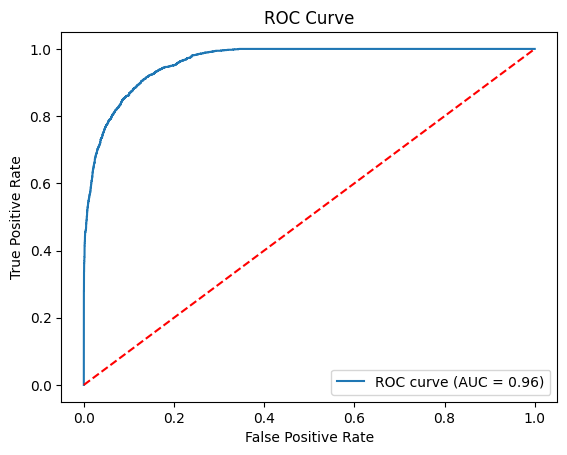

In [86]:
# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Text(95.72222222222221, 0.5, 'True Label')

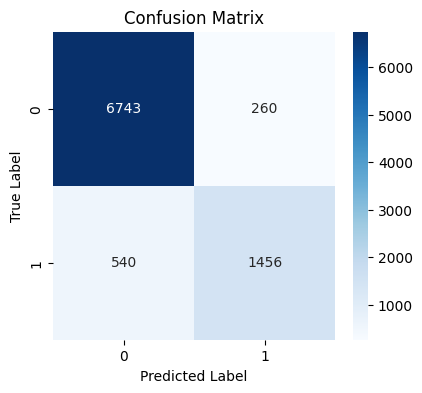

In [87]:
import seaborn as sns

# Plot confusion matrix

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")